In [1]:
# Import all the qiskit functions
from qiskit import *

In [2]:
qr = QuantumRegister(2) # Create a quantum register with 2 qubits

In [3]:
cr = ClassicalRegister(2) # Create a classical register with 2 bits

In [4]:
circuit = QuantumCircuit(qr, cr) # Create a quantum circuit with the quantum and classical registers

In [5]:
%matplotlib inline

In [6]:
circuit.draw() # Draw the circuit

q0_0: 
      
q0_1: 
      
c0: 2/

In [7]:
circuit.h(qr[0]) # Apply a Hadamard gate to the first qubit

/Users/ryan/anaconda3/envs/QISKIT/lib/python3.8/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


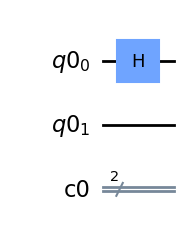

In [8]:
circuit.draw(output='mpl') # Draw the circuit

In [9]:
circuit.cx(qr[0], qr[1]) # Apply a CNOT gate with the first qubit as the control and the second qubit as the target

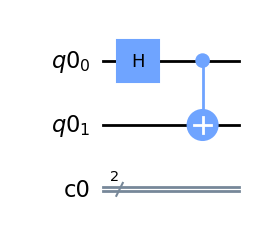

In [10]:
circuit.draw(output='mpl') # Draw the circuit

In [11]:
circuit.measure(qr, cr) # Measure the qubits and store the result in the classical register

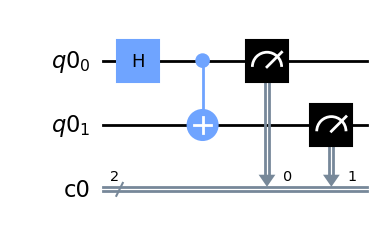

In [12]:
circuit.draw(output='mpl') # Draw the circuit

In [13]:
simulator = Aer.get_backend('qasm_simulator') # Create a simulator to run  the circuit on a classical computer

/var/folders/83/34nl81bn48538tdc27z6_hpc0000gn/T/ipykernel_5882/2208855912.py:1: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('qasm_simulator') # Create a simulator to run  the circuit on a classical computer


In [14]:
execute(circuit, backend=simulator) # Execute the circuit on the simulator

/var/folders/83/34nl81bn48538tdc27z6_hpc0000gn/T/ipykernel_5882/3416731933.py:1: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  execute(circuit, backend=simulator) # Execute the circuit on the simulator


In [15]:
# What are the results?
result = execute(circuit, backend=simulator).result()

/var/folders/83/34nl81bn48538tdc27z6_hpc0000gn/T/ipykernel_5882/3003964131.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circuit, backend=simulator).result()


In [16]:
from qiskit.tools.visualization import plot_histogram

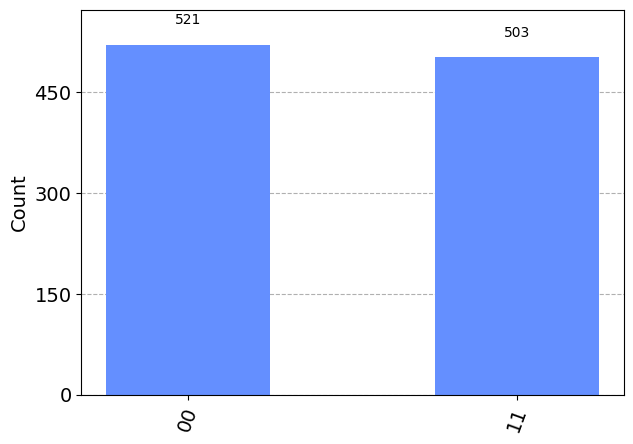

In [17]:
plot_histogram(result.get_counts(circuit))

In [18]:
# Now we want to runthe circuit on a real quantum computer
IBMQ.load_account() # Load the IBMQ account

/var/folders/83/34nl81bn48538tdc27z6_hpc0000gn/T/ipykernel_5882/2268141142.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account() # Load the IBMQ account
/var/folders/83/34nl81bn48538tdc27z6_hpc0000gn/T/ipykernel_5882/2268141142.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account() # Load the IBMQ account


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
provider = IBMQ.get_provider('ibm-q') # Get the provider

In [20]:
# just to check which quantum computers are available
from qiskit import IBMQ, Aer
provider = IBMQ.load_account()
available_cloud_backends = provider.backends() 
print('\n Cloud backends:')
for i in available_cloud_backends: print(i)

available_local_backends = Aer.backends() 
print('\n Local backends: ')
for i in available_local_backends: print(i)

ibmqfactory.load_account:WARNING:2024-02-16 10:59:33,224: Credentials are already in use. The existing account in the session will be replaced.



 Cloud backends:
ibmq_qasm_simulator
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibm_brisbane
ibm_kyoto
ibm_osaka

 Local backends: 
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
QasmSimulator('qasm_simulator')
StatevectorSimulator('statevector_simulator')
UnitarySimulator('unitary_simulator')


In [21]:
qcomp = provider.get_backend('ibm_kyoto') # Get the quantum computer who's neame is 16 melbourne

In [22]:
job = execute(circuit, backend=qcomp) # Execute the circuit on the quantum computer

/var/folders/83/34nl81bn48538tdc27z6_hpc0000gn/T/ipykernel_5882/3854747694.py:1: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit, backend=qcomp) # Execute the circuit on the quantum computer


In [23]:
from qiskit.tools.monitor import job_monitor

/var/folders/83/34nl81bn48538tdc27z6_hpc0000gn/T/ipykernel_5882/3559215437.py:1: DeprecationWarning: qiskit.tools.monitor is deprecated and will be removed in Qiskit 1.0.0
  from qiskit.tools.monitor import job_monitor


In [24]:
job_monitor(job) # Monitor the job

Job Status: job is queued (None)

KeyboardInterrupt: 

In [25]:
result = job.result() # Get the result

In [ ]:
plot_histogram(result.get_counts(circuit)) # Plot the result